In [1]:
import sys  
sys.path.insert(0, '/Stats-Toolbox')

from statsbox import Decision_Tree
from statsbox import K_Means
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random

# Benchmark KMEANS CLUSTERING

### Read in a dataset for clustering

In [2]:
df = pd.read_csv("../wine-clustering.csv")

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


##### use plot_elbow( ) to find a good value of k to use 

Generate a numpy array from the dataset

In [4]:
X = df.iloc[:, 0:].values

Now we will use the K_Means.plot_elbow() function to find out what our best K to use for this data set is.
As we can see below, we get an elbow point at k=4

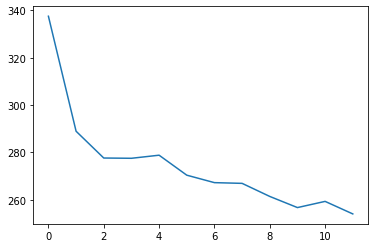

In [5]:
K_Means.plot_elbow(X, 12)

##  Benchmarking for dataset 1

###### call K.means.cluster to get clustered dataset, use sklearn.cluster.Kmeans to also get a clustered dataset, compare the two by
######                       1. visualize clusterings using our visualization function
######                       2. compare the cluster centroids returned by the clusterings
######                       3. check percentage of points classified differently across the two

### 1. Visualize clusterings in 2-D using K_Means.plot_clusters()

##### cluster using k = 2

###### a. statsbox Kmeans clustering

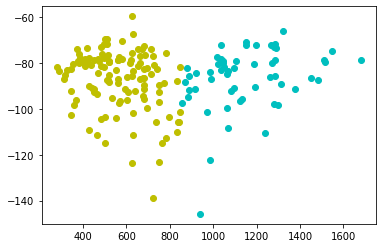

In [6]:
cluster, centroids = K_Means.cluster(2, X)
K_Means.plot_clusters(cluster, X)

###### b. sklearn Kmeans clustering

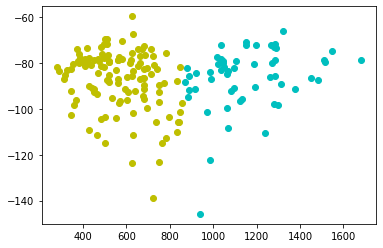

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
pred_clusters = kmeans.predict(X)
K_Means.plot_clusters(pred_clusters, X)

##### cluster using k = 4

###### a. statsbox Kmeans clustering

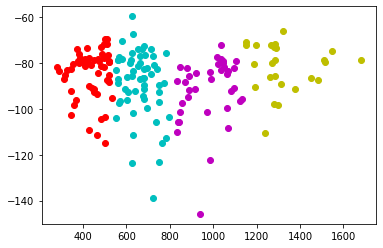

In [18]:
cluster, centroids = K_Means.cluster(4, X)
K_Means.plot_clusters(cluster, X)

###### b. sklearn Kmeans clustering

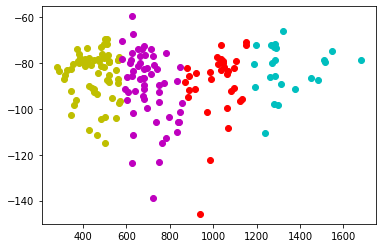

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
pred_clusters = kmeans.predict(X)
K_Means.plot_clusters(pred_clusters, X)

### 2. Compare the cluster centres

In [20]:
our_centroids = sorted(centroids, key=lambda x: x[0])
sklearn_centroids=[]
for c in kmeans.cluster_centers_:
    sklearn_centroids.append(c)
sklearn_centroids = sorted(sklearn_centroids, key=lambda x: x[0])

#### We can see below that centroids returned by statsbox kmeans are very close to the centroids returned by sklearn

In [21]:
for x in range(len(our_centroids)):
    a = []
    b = []
    print("for centroid c"+str(x))
    for i in range(len(our_centroids[0])):
        o = our_centroids[x][i]
        s = sklearn_centroids[x][i]
        a.append(round(o,2))
        b.append(round(s,2))
        
    print("our     centroid   " + str(a))
    print("sklearn centroid   " + str(b))    
        
    

for centroid c0
our     centroid   [12.48, 2.33, 2.28, 20.64, 91.72, 2.11, 1.87, 0.38, 1.47, 3.95, 0.96, 2.54, 435.58]
sklearn centroid   [12.5, 2.44, 2.28, 20.78, 92.47, 2.07, 1.8, 0.38, 1.47, 4.07, 0.95, 2.5, 452.55]
for centroid c1
our     centroid   [12.87, 2.7, 2.38, 20.24, 99.83, 2.03, 1.43, 0.4, 1.43, 5.55, 0.87, 2.27, 659.22]
sklearn centroid   [12.93, 2.66, 2.4, 19.98, 101.84, 2.05, 1.46, 0.4, 1.43, 5.75, 0.87, 2.3, 697.09]
for centroid c2
our     centroid   [13.44, 2.15, 2.4, 18.46, 108.51, 2.58, 2.48, 0.3, 1.75, 5.16, 0.99, 2.99, 976.7]
sklearn centroid   [13.53, 1.93, 2.37, 17.73, 106.5, 2.72, 2.74, 0.29, 1.88, 4.99, 1.04, 3.09, 1017.44]
for centroid c3
our     centroid   [13.86, 1.79, 2.48, 16.66, 104.84, 2.94, 3.14, 0.3, 2.0, 6.26, 1.11, 3.02, 1323.48]
sklearn centroid   [13.86, 1.79, 2.51, 17.07, 106.0, 2.94, 3.11, 0.3, 1.93, 6.26, 1.1, 3.04, 1338.57]


### 3. Compare the clusterings returned 

###### cluster ids of statsbox clustering

In [22]:
cluster 

array([2, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 3, 1, 3, 1, 3, 3, 1,
       3, 3, 1, 1, 2, 3, 3, 2, 2, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 1,
       1, 1, 3, 3, 3, 3, 3, 2, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 2, 2, 3, 1, 1, 1, 3, 3, 3, 1,
       1, 1, 3, 2, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 2,
       2, 1])

###### cluster ids of sklearn clustering

In [23]:
pred_clusters

array([3, 3, 1, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 3, 2, 2, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2,
       3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 3, 0, 0, 3, 3, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 3, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

###### change the cluster id indexes to match the order of the sklearn cluster ids (might need to be changed when run based on above two cells ^)

In [24]:
cluster_ours=[]
for c in cluster:
    c1=0
    if c==3:
        c1=0
    elif c==1:
        c1=2
    elif c==0:
        c1=1
    elif c==2:
        c1=3
        
    cluster_ours.append(c1)


In [25]:
#if order is the same
#cluster_ours=cluster

#### compare the differences in clustering

In [26]:
cluster_ours - pred_clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -2,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,
        2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  1,  1,  0,  0,  0,  2,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  1,  2])

#### compute the percentage similarity between clusterings

In [27]:
arr=cluster_ours - pred_clusters
c_z=0
for c in arr:
    if c==0:
        c_z+=1
print(c_z/len(arr))

0.898876404494382


## Benchmarking for Dataset 2

In [28]:
df = pd.read_csv("Credit Card Customer Data.csv")
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


##### use plot_elbow( ) to find a good value of k to use  

In [29]:
X = df.iloc[:, 1:].values

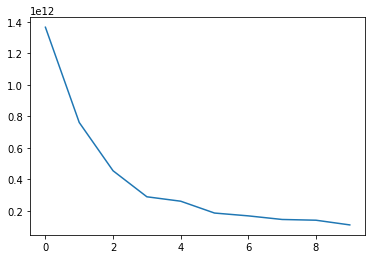

In [30]:
K_Means.plot_elbow(X, 10)

### 1. Visualize clusterings in 2-D using K_Means.plot_clusters()

##### cluster using k = 2

###### a. statsbox Kmeans clustering

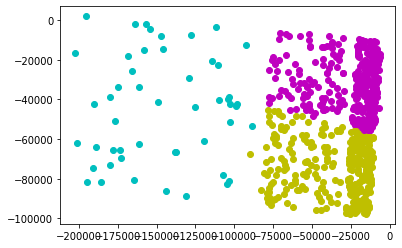

In [31]:
cluster, centroids = K_Means.cluster(3, X, 0)
K_Means.plot_clusters(cluster, X)

###### a. sklearn Kmeans clustering

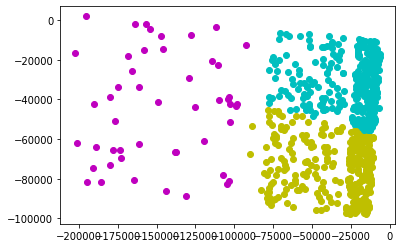

In [32]:

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
pred_clusters = kmeans.predict(X)
K_Means.plot_clusters(pred_clusters, X)

### 2. Compare the cluster centres

In [33]:
pred_clusters = kmeans.predict(X)

In [34]:
our_centroids = sorted(centroids, key=lambda x: x[0])
sklearn_centroids=[]
for c in kmeans.cluster_centers_:
    sklearn_centroids.append(c)
sklearn_centroids = sorted(sklearn_centroids, key=lambda x: x[0])

for x in range(len(our_centroids)):
    a = []
    b = []
    print("for centroid c"+str(x))
    for i in range(len(our_centroids[0])):
        o = our_centroids[x][i]
        s = sklearn_centroids[x][i]
        a.append(round(o,2))
        b.append(round(s,2))
        
    print("our     centroid   " + str(a))
    print("sklearn centroid   " + str(b))    

for centroid c0
our     centroid   [34029.89, 23097.79, 4.41, 2.53, 2.0, 3.79]
sklearn centroid   [34029.89, 23097.79, 4.41, 2.53, 2.0, 3.79]
for centroid c1
our     centroid   [56950.04, 141360.0, 8.6, 0.6, 10.62, 1.08]
sklearn centroid   [56872.86, 142530.61, 8.57, 0.59, 10.57, 1.06]
for centroid c2
our     centroid   [77673.64, 28767.92, 4.36, 2.57, 1.9, 3.78]
sklearn centroid   [77616.02, 28955.78, 4.38, 2.57, 1.94, 3.78]


### 3. Compare the clusterings returned 

In [35]:
cluster 

array([1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0,

In [36]:
pred_clusters

array([2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,

change the below code based on the above cells

In [37]:
cluster_ours=[]
pred_cluster=[]
for c in cluster:
    if c==0:
        c1=0
    elif c==1:
        c1=2
    elif c==2:
        c1=1
    cluster_ours.append(c1)
for b in pred_clusters:
    pred_cluster.append(b)

In [38]:
cluster_ours - pred_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### compute the percentage similarity between clusterings

In [39]:
arr=cluster_ours - pred_clusters
c_z=0
for c in arr:
    if c==0:
        c_z+=1
print(c_z/len(arr))

0.9984848484848485


# Benchmarking Decision Tree

##  Benchmarking for dataset 1

###### fit the statsbox decision tree and the sklearn decision tree to the sam
######                       1. visualize clusterings using our visualization function
######                       2. compare the cluster centroids returned by the clusterings
######                       3. check percentage of points classified differently across the two

In [448]:
df = pd.read_csv("stroke-data.csv")
col_names = ['age', 'hypertension', 'heart_disease', 'Cholesterol', 'avg_glucose_level', 'bmi']
data = df

In [449]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Preprocess the data to make all variables numerical

In [450]:
gender = df['gender']
res = df['Residence_type']
smoke = df['smoking_status']
job = df['work_type']
smoke2=[]
gender2=[]
res2=[]
job2=[]
for i in range(len(gender)):
    if gender[i]=='Male':
        gender2.append(1)
    else:
        gender2.append(0)
    
    if res[i]=='Urban':
        res2.append(1)
    else:
        res2.append(2)
    
    if smoke[i]=='never smoked':
        smoke2.append(1)
    elif smoke[i]=='formerly smoked':
        smoke2.append(2)
    elif smoke[i]=='smokes':
        smoke2.append(3)
    else:
        smoke2.append(0)
    
    if job[i]=='Private':
        job2.append(0)
    elif job[i]=='Self-employed':
        job2.append(1)
    else:
        job2.append(2)

In [451]:
df = df.drop(['ever_married','gender', 'Residence_type', 'smoking_status', 'work_type'], axis=1)

In [452]:
df['gender']=gender2
df['Residence_type']=res2
df['smoking_status']=smoke2
df['work_type']=job2

In [453]:
df=df.dropna()
Y = df['stroke'].values.reshape(-1, 1)
df = df.drop(['stroke'], axis=1)
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,Residence_type,smoking_status,work_type
0,9046,67.0,0,1,228.69,36.6,1,1,2,0
2,31112,80.0,0,1,105.92,32.5,1,2,1,0
3,60182,49.0,0,0,171.23,34.4,0,1,3,0
4,1665,79.0,1,0,174.12,24.0,0,2,1,1
5,56669,81.0,0,0,186.21,29.0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...
5104,14180,13.0,0,0,103.08,18.6,0,2,0,2
5106,44873,81.0,0,0,125.20,40.0,0,1,1,1
5107,19723,35.0,0,0,82.99,30.6,0,2,1,1
5108,37544,51.0,0,0,166.29,25.6,1,2,2,0


##### after processing the data create train and test split and compare accuracy to sklearn classifier 

In [465]:
X = df.iloc[:, 1:].values

In [466]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=.2, random_state=41)

### fit both models to the data and compare accuracy

In [467]:
classifier = Decision_Tree.DecisionTreeClassifier(
    min_samples_split=3, max_depth=8)

classifier.fit(X_train, Y_train, 'entropy')

Y_pred = classifier.predict(X_test)
print("Test data accuracy of statsbox Decision Tree:",accuracy_score(Y_test, Y_pred))

Test data accuracy of statsbox Decision Tree: 0.9541751527494908


In [468]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Test data accuracy of sklearn Decision Tree:",accuracy_score(Y_test, Y_pred))

Test data accuracy of sklearn Decision Tree: 0.9144602851323829


##  Benchmarking for dataset 2

### load the iris data set which is standard sklearn dataset which is already preprocessed; and create train test split

In [472]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
# Reading the Iris.csv file
data = load_iris()

# Extracting Attributes / Features
X = data.data

# Extracting Target / Class Labels
y = data.target

# Import Library for splitting data
from sklearn.model_selection import train_test_split

# Creating Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.25)


In [473]:
y_train = y_train.reshape(-1,1)

In [476]:
clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Test data accuracy of sklearn Decision Tree:",accuracy_score(y_true = y_test, y_pred=clf.predict(X_test)))

Test data accuracy of sklearn Decision Tree: 0.9473684210526315


In [478]:
classifier = Decision_Tree.DecisionTreeClassifier(
    min_samples_split=5, max_depth=8)

classifier.fit(X_train, y_train, 'entropy')


Y_pred = classifier.predict(X_test)
print("Test data accuracy of statsbox Decision Tree:",accuracy_score(y_test, Y_pred))

Test data accuracy of statsbox Decision Tree: 0.9736842105263158


##  Benchmarking for dataset 3

### load the titanic survial dataset 

In [479]:
df = pd.read_csv("../train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### data preprocessing 

In [480]:
df=df.dropna()

In [481]:

Y = df['Survived'].values.reshape(-1, 1)

df = df.drop(['Cabin', 'Name', 'Ticket', 'Embarked', 'PassengerId', 'Survived', 'Sex'], axis=1)


In [482]:
X = df.iloc[:, :].values
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=.2, random_state=41)

### compare the accuracies of statsbox dtree and sklearn dtree 

In [483]:
classifier = Decision_Tree.DecisionTreeClassifier(
    min_samples_split=2, max_depth=6)

In [487]:
classifier.fit(X_train, Y_train, 'entropy')

Y_pred = classifier.predict(X_test)
print("Test data accuracy of statsbox Decision Tree:",accuracy_score(Y_test, Y_pred))

Test data accuracy of statsbox Decision Tree: 0.5405405405405406


In [488]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Test data accuracy of sklearn Decision Tree:",accuracy_score(Y_test, Y_pred))

Test data accuracy of sklearn Decision Tree: 0.5945945945945946
